Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

Get Data

In [2]:
AFL = pd.read_csv("/Users/shaneregel/Documents/Betting/AussieRulesRegularSeasonGameData.csv")
AFL.head()

,Year,Round,Team1,Team2,Team1.Result,Team2.Result,Team1.1QTotal,Team1.2QTotal,Team1.3QTotal,Team1.4QTotal,Team2.1QTotal,Team2.2QTotal,Team2.3QTotal,Team2.4QTotal
0,2018,1,Richmond Tigers,Carlton Blues,W,L,21,32,15,37,20,22,18,20
1,2018,1,Collingwood Magpies,Western Bulldogs,L,W,8,22,7,16,20,21,20,8
2,2018,1,Melbourne Demons,Freemantle Dockers,W,L,28,20,14,18,4,22,19,13
3,2018,1,Adelaide Crows,Geelong Cats,W,L,28,45,14,16,15,20,33,23
4,2018,1,Essendon Bombers,Hawthorn Hawks,L,W,16,50,10,15,19,8,48,17


Create derived columns
- Spread
- Game Total
- Team Total

In [3]:
AFL['Team1.Total'] = AFL['Team1.1QTotal'] + AFL['Team1.2QTotal'] + AFL['Team1.3QTotal'] + AFL['Team1.4QTotal']
AFL['Team2.Total'] = AFL['Team2.1QTotal'] + AFL['Team2.2QTotal'] + AFL['Team2.3QTotal'] + AFL['Team2.4QTotal']
AFL['Game.Total'] = AFL['Team1.Total'] + AFL['Team2.Total']
AFL.head()

,Year,Round,Team1,Team2,Team1.Result,Team2.Result,Team1.1QTotal,Team1.2QTotal,Team1.3QTotal,Team1.4QTotal,Team2.1QTotal,Team2.2QTotal,Team2.3QTotal,Team2.4QTotal,Team1.Total,Team2.Total,Game.Total
0,2018,1,Richmond Tigers,Carlton Blues,W,L,21,32,15,37,20,22,18,20,105,80,185
1,2018,1,Collingwood Magpies,Western Bulldogs,L,W,8,22,7,16,20,21,20,8,53,69,122
2,2018,1,Melbourne Demons,Freemantle Dockers,W,L,28,20,14,18,4,22,19,13,80,58,138
3,2018,1,Adelaide Crows,Geelong Cats,W,L,28,45,14,16,15,20,33,23,103,91,194
4,2018,1,Essendon Bombers,Hawthorn Hawks,L,W,16,50,10,15,19,8,48,17,91,92,183


Re-order columns

In [4]:
AFL = AFL.reindex(columns=['Year', 'Round', 'Game.Total', 'Team1', 'Team1.Result', 'Team1.Total', 'Team1.1QTotal', 'Team1.2QTotal', 'Team1.3QTotal', 'Team1.4QTotal', 'Team2', 'Team2.Result', 'Team2.Total', 'Team2.1QTotal', 'Team2.2QTotal', 'Team2.3QTotal', 'Team2.4QTotal'])
AFL.head()


,Year,Round,Game.Total,Team1,Team1.Result,Team1.Total,Team1.1QTotal,Team1.2QTotal,Team1.3QTotal,Team1.4QTotal,Team2,Team2.Result,Team2.Total,Team2.1QTotal,Team2.2QTotal,Team2.3QTotal,Team2.4QTotal
0,2018,1,185,Richmond Tigers,W,105,21,32,15,37,Carlton Blues,L,80,20,22,18,20
1,2018,1,122,Collingwood Magpies,L,53,8,22,7,16,Western Bulldogs,W,69,20,21,20,8
2,2018,1,138,Melbourne Demons,W,80,28,20,14,18,Freemantle Dockers,L,58,4,22,19,13
3,2018,1,194,Adelaide Crows,W,103,28,45,14,16,Geelong Cats,L,91,15,20,33,23
4,2018,1,183,Essendon Bombers,L,91,16,50,10,15,Hawthorn Hawks,W,92,19,8,48,17


Game Total Distribution

/Users/shaneregel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Game.Total', ylabel='Density'>

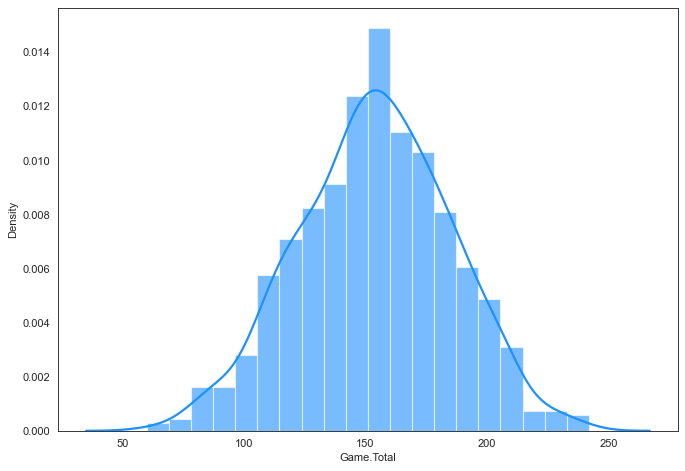

In [5]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(AFL['Game.Total'], color="dodgerblue", **kwargs)

In [6]:
frequency = AFL['Game.Total'].value_counts()
print("Frequency of Game Total's")
frequency

Frequency of Game Total's


156    18
158    15
152    13
141    12
170    12
       ..
90      1
89      1
86      1
72      1
242     1
Name: Game.Total, Length: 143, dtype: int64

Team Total Distribution

In [7]:
team1 = AFL['Team1.Total']
team2 = AFL['Team2.Total']
teamTotals = pd.concat([team1,team2])
teamTotals

0      105
1       53
2       80
3      103
4       91
      ... 
740     81
741     89
742     49
743     64
744     54
Length: 1490, dtype: int64

/Users/shaneregel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

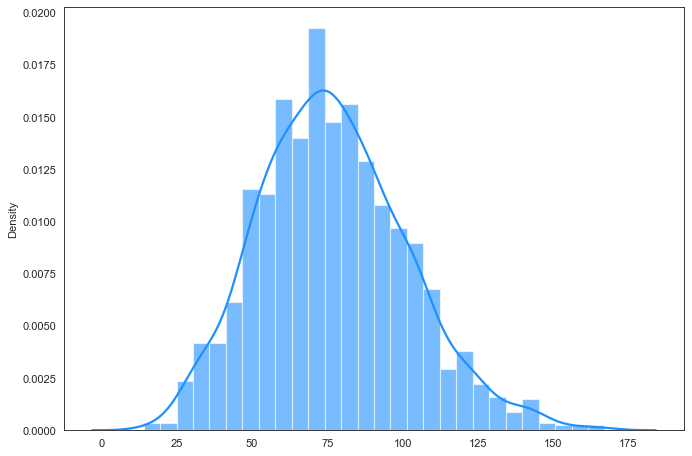

In [8]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(teamTotals, color="dodgerblue", **kwargs)

In [9]:
frequency = teamTotals.value_counts()
print("Frequency of Team Total's")
frequency

Frequency of Team Total's


73     39
72     31
80     29
71     29
79     28
       ..
127     1
17      1
21      1
19      1
167     1
Length: 130, dtype: int64